In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv(r"C:\Users\prash\Documents\Prashant_doc\Study_Materials\Data_Science\Machine_learning\ML\Projects\Air_Pressure_project\airfoil_self_noise.dat",sep='\t',header=None)

In [4]:
df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [5]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [6]:
df.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side', 'pressure level'],
      dtype='object')

In [7]:
df.shape

(1503, 6)

In [8]:
## let's check the data types 

df.dtypes



Frequency                 int64
Angle of attack         float64
Chord length            float64
Free-stream velocity    float64
Suction side            float64
pressure level          float64
dtype: object

In [9]:
## Let's check the null values 

df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

## There is no null values in the data 

In [10]:
### check the no. of observation  in  each columns of the  data 

for var in df.columns:
    print(var,len(df[var]))

Frequency 1503
Angle of attack 1503
Chord length 1503
Free-stream velocity 1503
Suction side 1503
pressure level 1503


## All the columns has same amount of the observation 

In [11]:
## let's check the distribution of the each columns

def distribution(df,var):
    plt.figure(figsize=(5,3))
    sns.histplot(data=df,x=var,bins=20)
    plt.show()

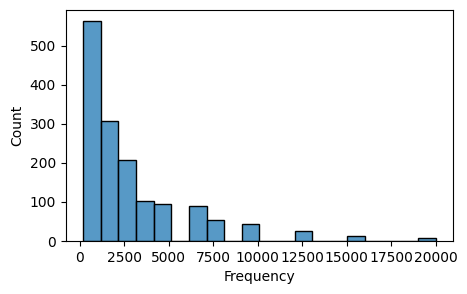

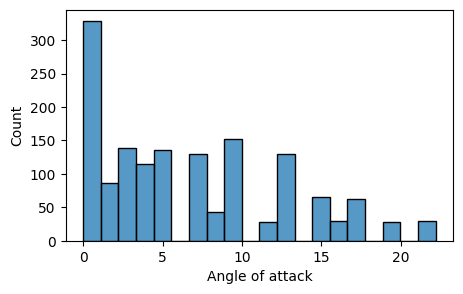

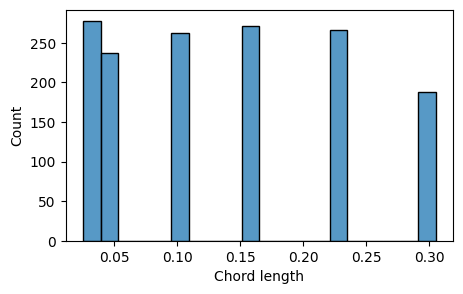

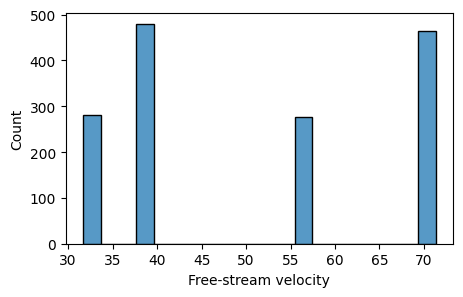

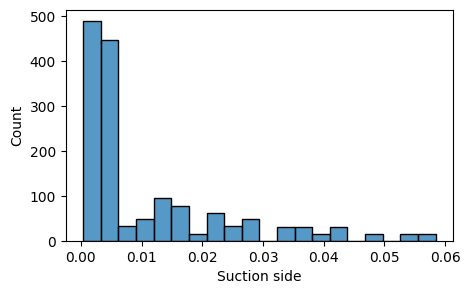

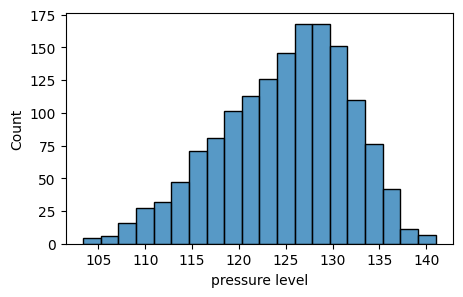

In [12]:
for var in df.columns:
    distribution(df,var)

In [13]:
## check the relation b/w pressure level and other columns 

def line_plot(df,var):
    plt.figure(figsize=(5,3))
    sns.lineplot(data=df,x=var,y='pressure level',estimator='mean')
    plt.show()

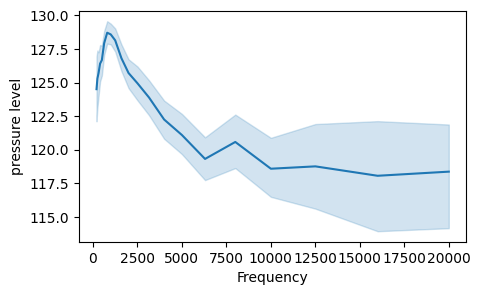

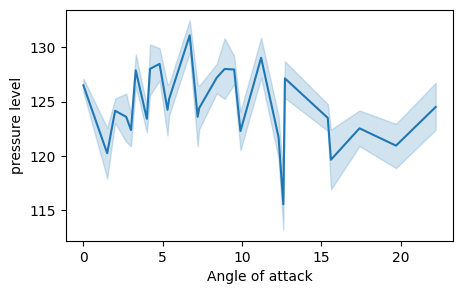

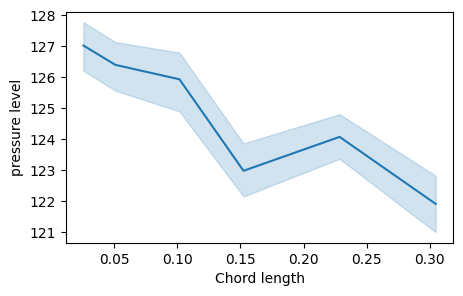

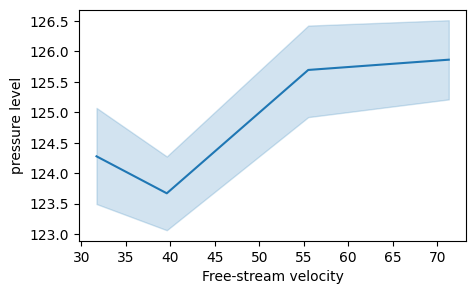

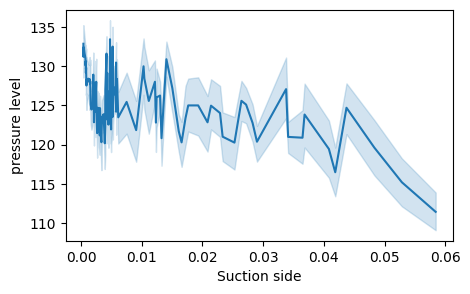

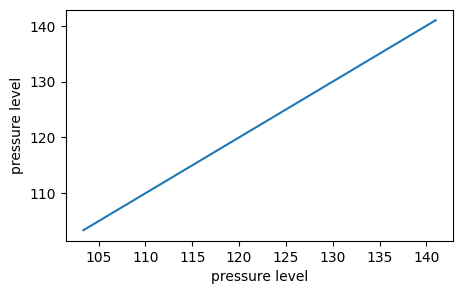

In [14]:
for var in df.columns:
    line_plot(df,var)

In [15]:
## check the outliers in the data 

def outliers(df,var):
    plt.figure(figsize=(10,3))
    sns.boxplot(df[var],orient='h')
    plt.xlabel(var)
    plt.show()

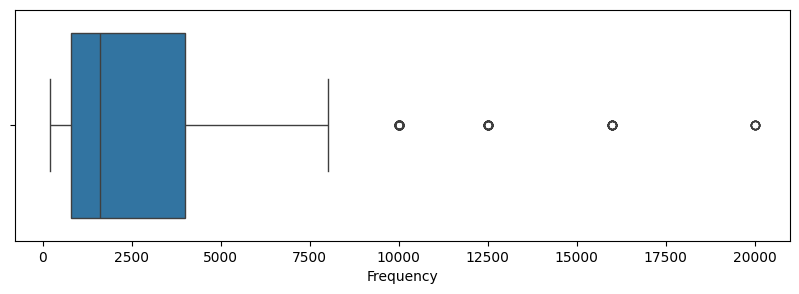

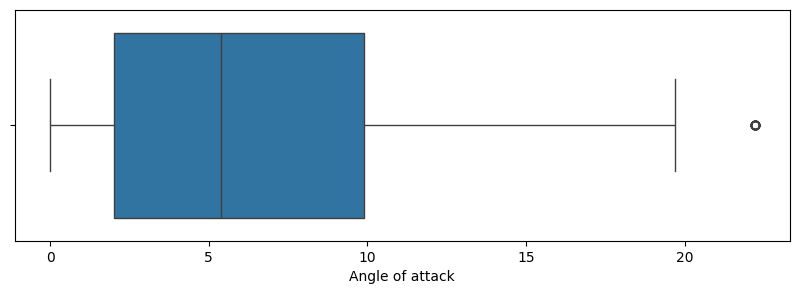

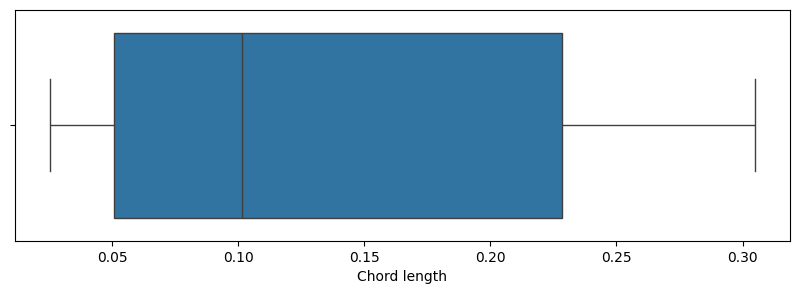

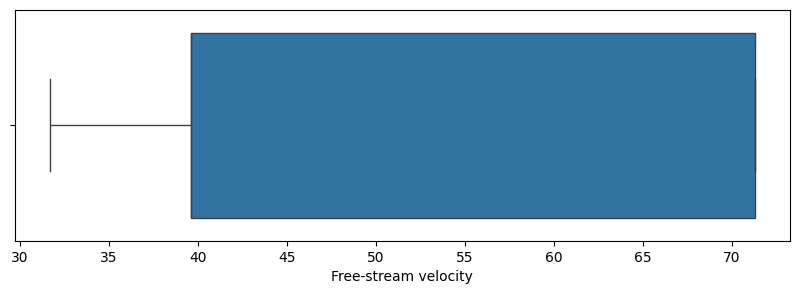

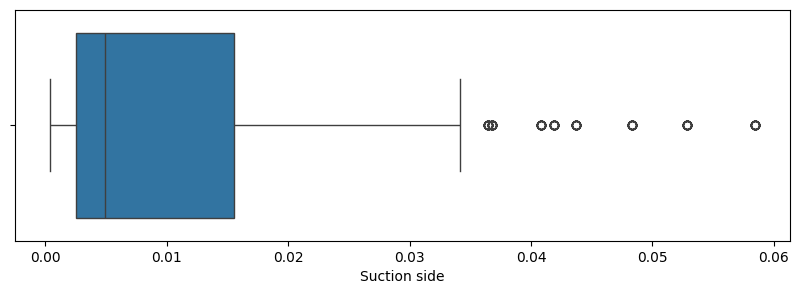

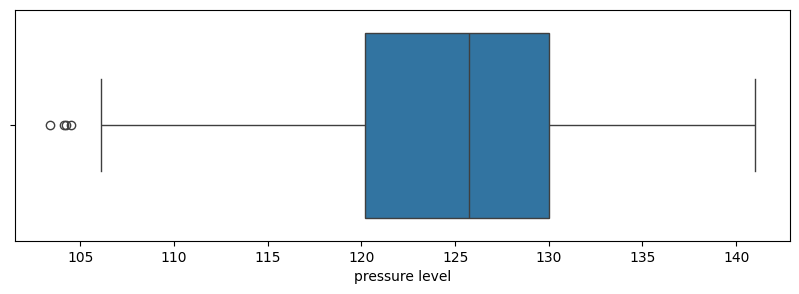

In [16]:
for var in df.columns:
    outliers(df,var)

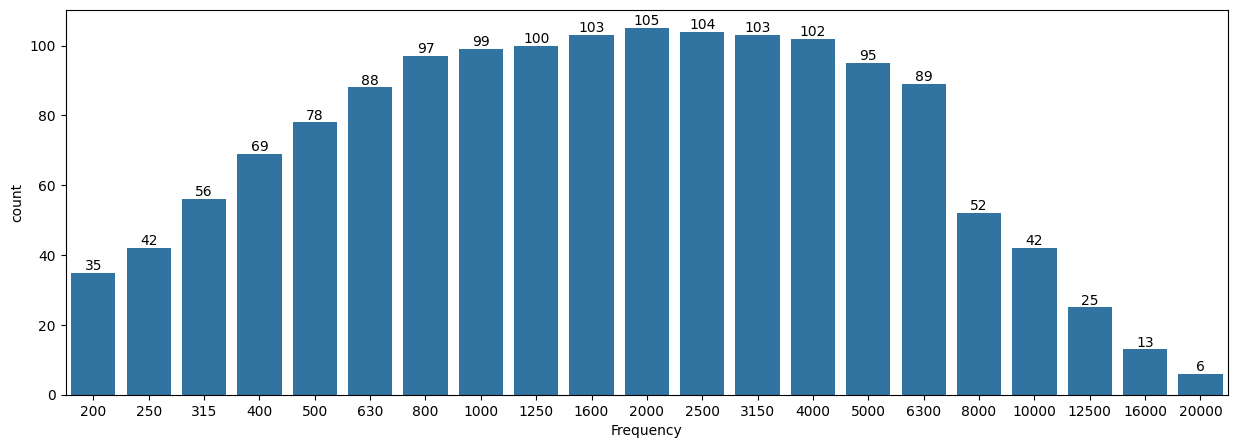

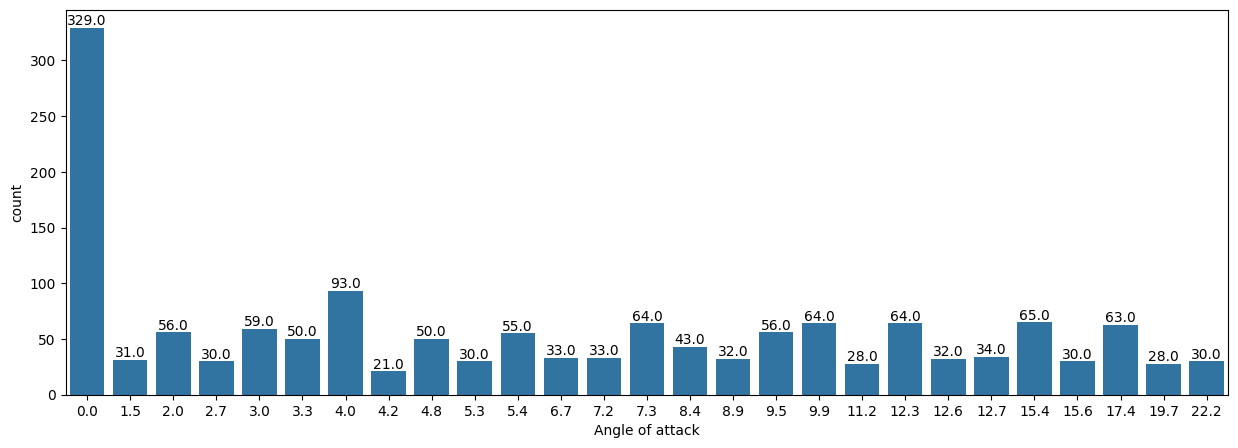

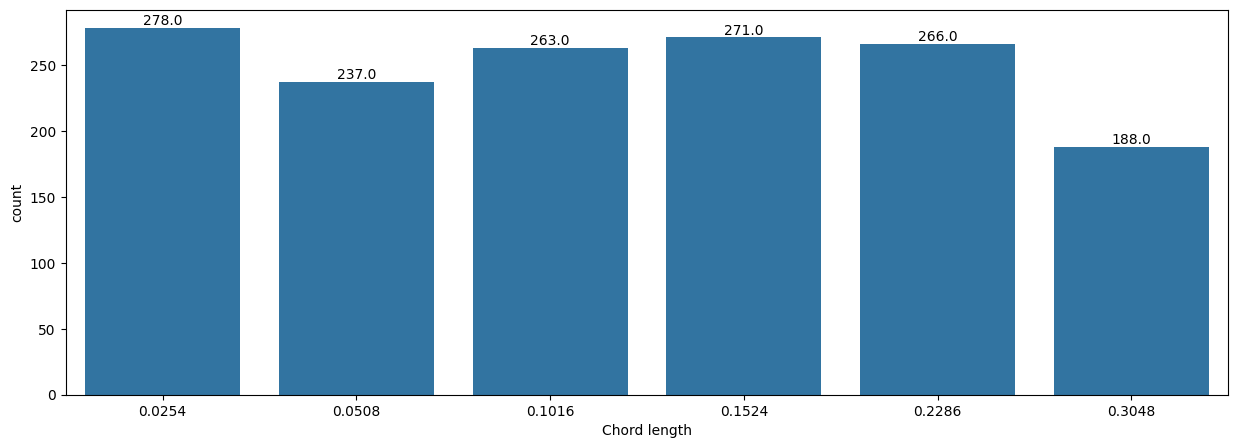

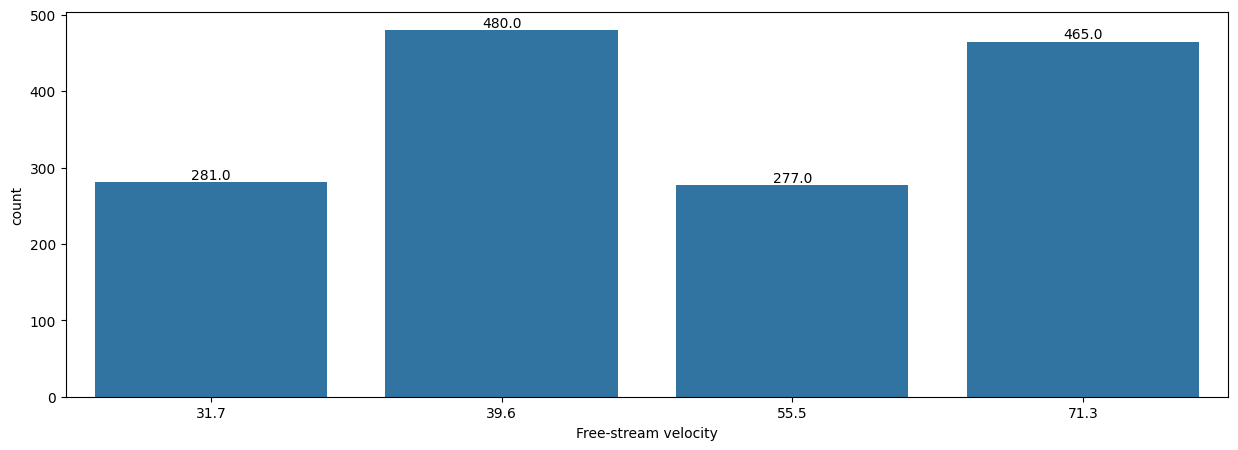

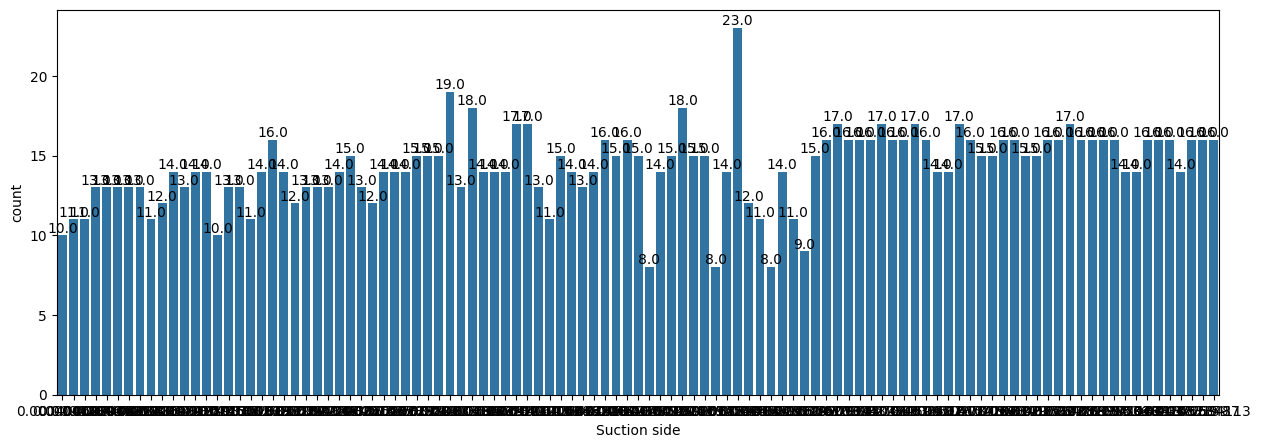

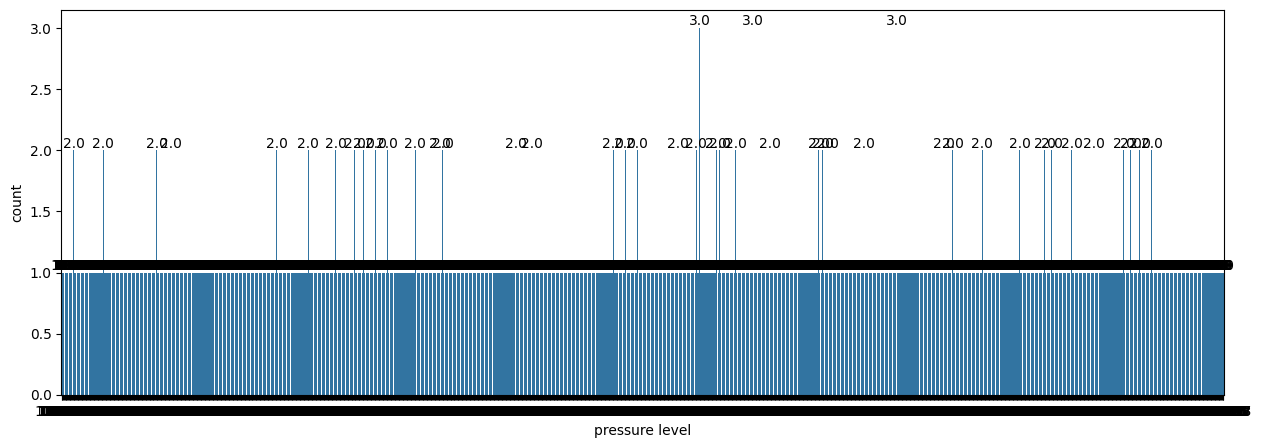

In [17]:
## check the values counts distribution

for var in df.columns:
    frq=df[var].value_counts().reset_index()
    frq.sort_values(by=var,ignore_index=True,inplace=True)
    plt.figure(figsize=(15,5))
    sns.barplot(data=frq,x=var,y='count',estimator='sum')
    for index,row in frq.iterrows():
        plt.text(index, row['count'], str(row['count']), ha='center', va='bottom')

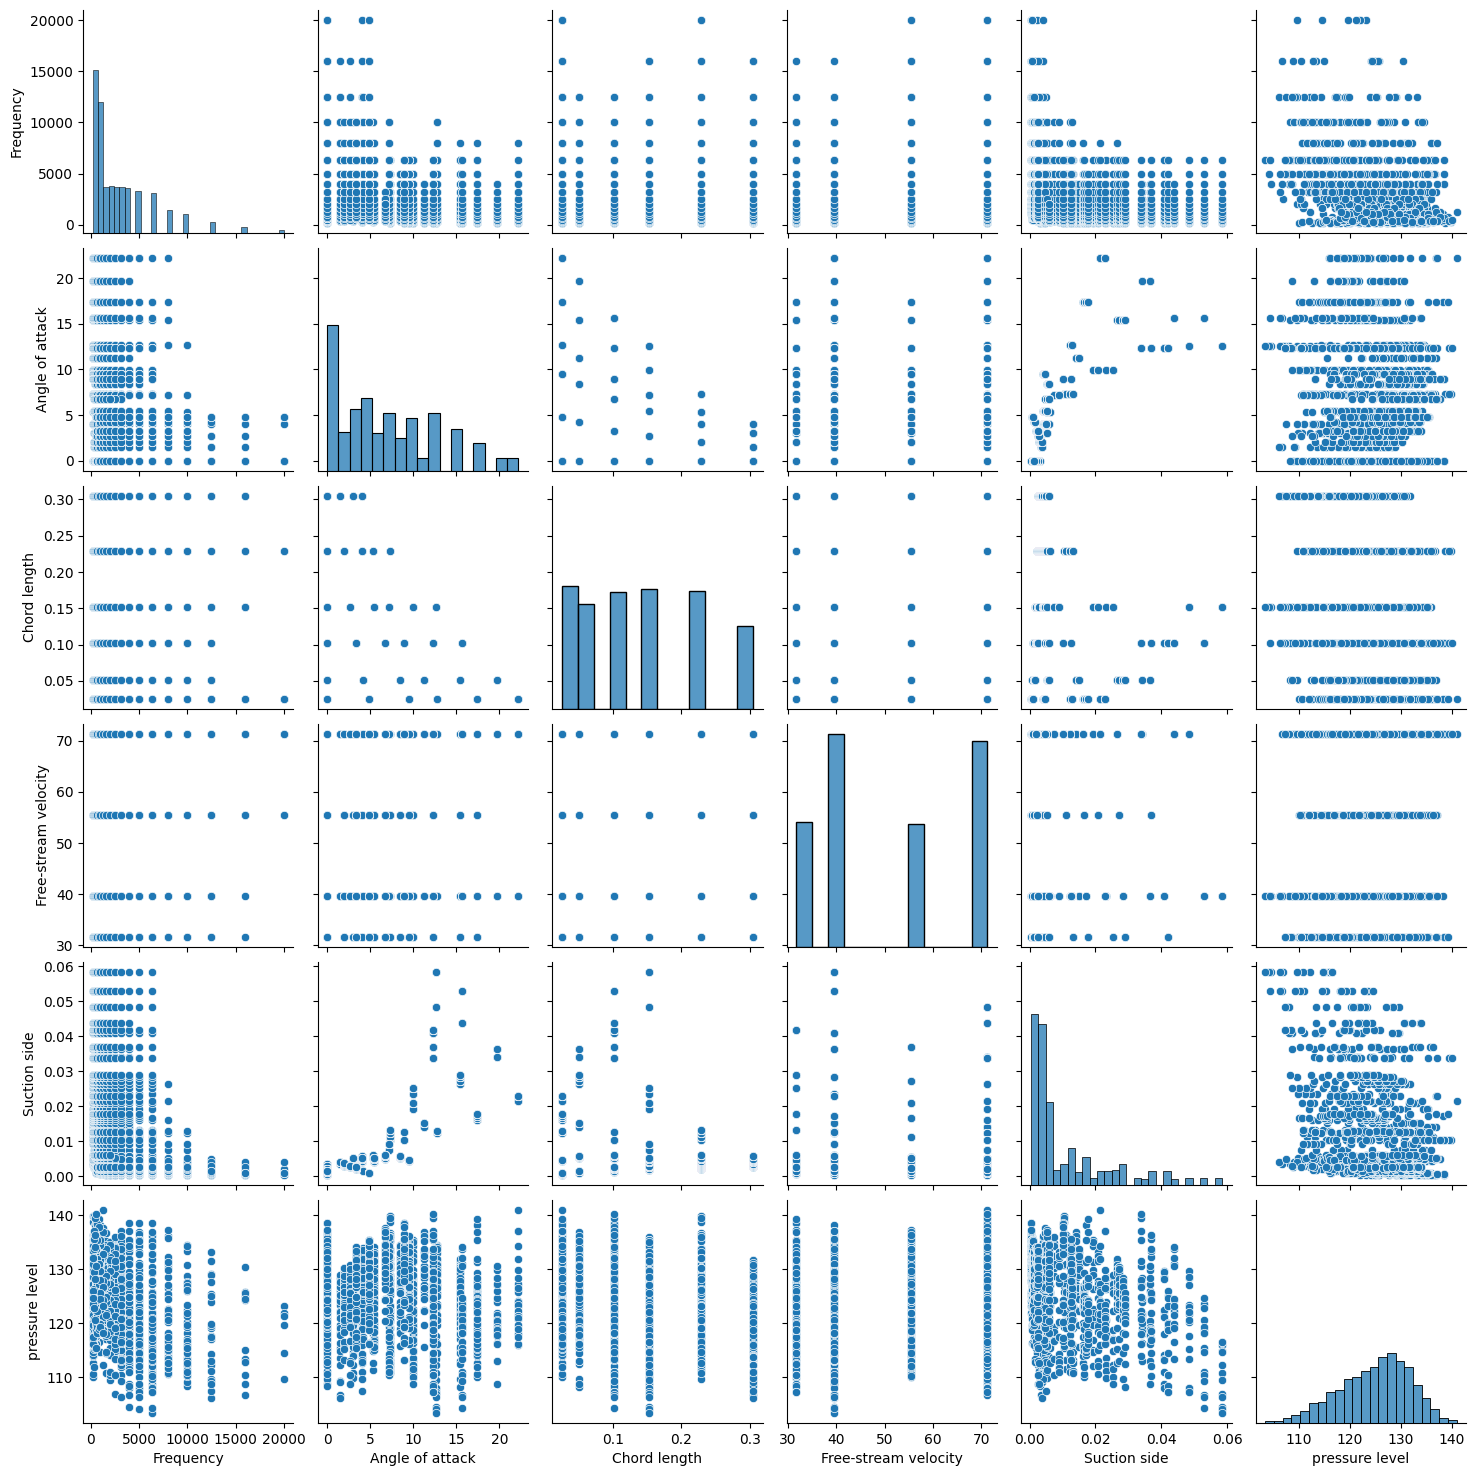

In [18]:
sns.pairplot(df)

In [19]:
## check the correlation 

corr=df.corr()

In [20]:
corr

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle of attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free-stream velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction side,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
pressure level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [21]:
corr['pressure level']

Frequency              -0.390711
Angle of attack        -0.156108
Chord length           -0.236162
Free-stream velocity    0.125103
Suction side           -0.312670
pressure level          1.000000
Name: pressure level, dtype: float64

<Axes: >

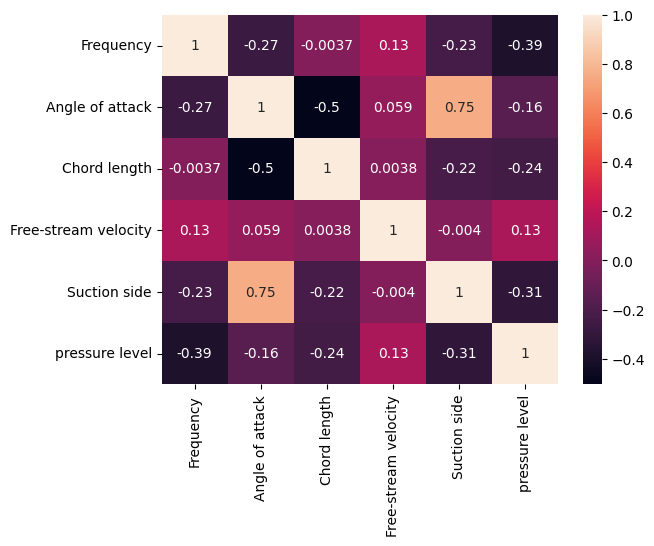

In [22]:
sns.heatmap(corr,annot=True)

correlation with the target data is very low and negative 

In [23]:
### split the data into train and test

X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [25]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((1052, 5), (1052,), (451, 5), (451,))

In [26]:
## scale the data as it is not in same range

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


In [27]:
scaler.fit(X_train)

MinMaxScaler()

In [28]:
X_train_scales=scaler.transform(X_train)

X_train=pd.DataFrame(X_train_scales,columns=X_train.columns)

In [29]:
X_train

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
0,0.015152,0.378378,0.090909,0.199495,0.090701
1,0.090909,0.693694,0.090909,1.000000,0.448646
2,0.148990,0.887387,0.090909,1.000000,0.581232
3,0.040404,0.504505,0.090909,0.199495,0.252490
4,0.116162,0.567568,0.454545,1.000000,0.825973
...,...,...,...,...,...
1047,0.621212,0.000000,0.090909,0.199495,0.006743
1048,0.053030,0.378378,0.090909,0.000000,0.093208
1049,0.053030,1.000000,0.000000,1.000000,0.362298
1050,0.053030,0.243243,0.454545,0.601010,0.067784


In [30]:
X_test_scaled=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [31]:
X_test


,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
0,0.494949,0.000000,0.000000,1.000000,0.000000
1,0.308081,0.000000,1.000000,1.000000,0.039005
2,0.116162,0.554054,0.272727,0.000000,0.714954
3,0.010101,0.783784,0.000000,1.000000,0.270697
4,0.116162,0.693694,0.090909,1.000000,0.448646
...,...,...,...,...,...
446,0.053030,0.243243,0.454545,1.000000,0.062253
447,0.494949,0.148649,0.272727,0.199495,0.035350
448,0.040404,0.148649,0.272727,0.000000,0.036436
449,0.090909,0.000000,0.454545,1.000000,0.020653


## Linear Regressions

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score

linear_model=LinearRegression()
model=cross_val_score(linear_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
score=np.mean(-model)
print("score of the linear model using the cross val score is ",score)

score of the linear model using the cross val score is  23.65730841963712


In [33]:
linear_model.fit(X_train,Y_train)

## train data 
predict_y_train=linear_model.predict(X_train)
mse_train=mean_squared_error(Y_train,predict_y_train)
r2_linear_train=r2_score(Y_train,predict_y_train)

### test data
predict_y=linear_model.predict(X_test)
mse=mean_squared_error(Y_test,predict_y)
r2_linear_test=r2_score(Y_test,predict_y)



print("Train Data")
print(f"The Mse of linear model with train data  {round(mse_train,2)}")
print(f"The r2 score of linear model with train data  {round(r2_linear_train,2)}")
print("\n********")
print("Test Data")
print(f"The Mse of linear model with test data  {round(mse,2)}")
print(f"The r2 score of linear model with test data  {round(r2_linear_test,2)}")

Train Data
The Mse of linear model with train data  23.35
The r2 score of linear model with train data  0.51

********
Test Data
The Mse of linear model with test data  22.4
The r2 score of linear model with test data  0.52


## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

In [35]:
## intilize the model of the Ridge 
model_ridge=Ridge()

## define the grid parameters to search

pram ={'alpha':[0.1,0.4,0.5,0.6,1,2,3,4,5,8,9,10,13,15,20]}

## create the grid search cv intance 

model_ridge_grid=GridSearchCV(model_ridge,pram,cv=5,scoring='neg_mean_squared_error')



## get the feature importance 

ridge=Ridge(alpha=0.1)
ridge.fit(X_train,Y_train)

## get the feature importance 

feature_importance =np.abs(ridge.coef_)
feature_importance

sorted_indices=np.argsort(feature_importance)[::-1]

sorted_indices

sorted_features=[f'feature {i+1}' for i in sorted_indices]
sorted_features

print("Feature Importance Ranking:")
for feature, importance in zip(sorted_features, feature_importance[sorted_indices]):
    print(f"{feature}: {importance:.4f}")

In [36]:
## train the model using the train data 

model_ridge_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.4, 0.5, 0.6, 1, 2, 3, 4, 5, 8, 9, 10,
                                   13, 15, 20]},
             scoring='neg_mean_squared_error')

In [37]:
## check the best parameters 
print("the best score ",model_ridge_grid.best_score_)
print("The best param",model_ridge_grid.best_estimator_)


the best score  -23.655802629282327
The best param Ridge(alpha=0.1)


In [38]:
### use the model to pridict the and check the score 

## for train data 
best_ridge_model=model_ridge_grid.best_estimator_

Y_train_predict= best_ridge_model.predict(X_train)
mse_ridge_train=mean_squared_error(Y_train,Y_train_predict)
r2_ridge_train=r2_score(Y_train,Y_train_predict)


print("Train Data")
print("mse of the train data",round(mse_ridge_train,2))
print("r2 score of the train data",round(r2_ridge_train,2))

## test data 
Y_test_predict= best_ridge_model.predict(X_test)
mse_ridge_test=mean_squared_error(Y_test,Y_test_predict)
r2_ridge_test=r2_score(Y_test,Y_test_predict)

print("Test Data")
print("mse of the test data",round(mse_ridge_test,2))
print("r2 score of the test data",round(r2_ridge_test,2))


Train Data
mse of the train data 23.35
r2 score of the train data 0.51
Test Data
mse of the test data 22.4
r2 score of the test data 0.52


## SVR Support Vector Regressor model 

In [39]:
from sklearn.svm import SVR 

In [40]:
## intilize the model of the SVR 
svr=SVR()

## Define the grid parameters to search 

param={'kernel':['rbf'],## to create the higher dimension space 
       'C':[0.1,0.5,1],## trade of the flatness of the regulrization plan and to allow the amount of training error 
       'gamma':[0.1,0.2,0.3,'scale', 'auto'],## cofficient of the kernal rbf and poly
       'epsilon':[0.1,0.01,0.001]## define the margin of tolarance where no penalty is given to error 
      }

svr_grid=GridSearchCV(svr,param,cv=5,scoring='neg_mean_squared_error')

In [41]:
svr_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 1], 'epsilon': [0.1, 0.01, 0.001],
                         'gamma': [0.1, 0.2, 0.3, 'scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [42]:
print(svr_grid.best_score_)
print(svr_grid.best_params_)
print(svr_grid.best_estimator_)

-19.644718823065197
{'C': 1, 'epsilon': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}
SVR(C=1, epsilon=0.001)


In [43]:
### use the model to pridict the and check the score 

## for train data 
best_svr_model=svr_grid.best_estimator_

Y_train_predict= best_svr_model.predict(X_train)
mse_svr_train=mean_squared_error(Y_train,Y_train_predict)
r2_svr_train=r2_score(Y_train,Y_train_predict)


print("Train Data")
print("mse of the train data",round(mse_svr_train,2))
print("r2 score of the train data",round(r2_svr_train,2))

## test data 
Y_test_predict= best_svr_model.predict(X_test)
mse_svr_test=mean_squared_error(Y_test,Y_test_predict)
r2_svr_test=r2_score(Y_test,Y_test_predict)

print("Test Data")
print("mse of the test data",round(mse_svr_test,2))
print("r2 score of the test data",round(r2_svr_test,2))


Train Data
mse of the train data 18.25
r2 score of the train data 0.62
Test Data
mse of the test data 18.03
r2 score of the test data 0.62


## Decision Tree 

In [44]:
from sklearn.tree import DecisionTreeRegressor

### intilize the decision tree object 
decision_tree=DecisionTreeRegressor()

## define the grid parameter to search 
pram ={
    'max_depth':[3,4,5,10,15,20],### depth of the tree
    'min_samples_split':[None,2,4,5,10,15,12,20],#The minimum number of samples required to split an internal node
    'criterion':['squared_error', 'absolute_error', 'poisson'],# this measure the quality of the split 
    'min_samples_leaf':[None,2,4,5,10,15,12,20],#The minimum number of samples required to be at a leaf node
    'max_features':[None,'sqrt','log2']# the number of feature to consider when looking for the best split    
}



In [45]:
decision_grid=GridSearchCV(decision_tree,pram,cv=5,scoring='neg_mean_squared_error')

In [46]:
decision_grid.fit(X_train,Y_train)

c:\Users\prash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4050 fits failed out of a total of 17280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\prash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\prash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 4, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [None, 2, 4, 5, 10, 15, 12, 20],
                         'min_samples_split': [None, 2, 4, 5, 10, 15, 12, 20]},
             scoring='neg_mean_squared_error')

In [47]:
decision_grid.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=20, min_samples_leaf=2,
                      min_samples_split=5)

In [48]:
### use the model to pridict the and check the score 

## for train data 
best_tree_model=decision_grid.best_estimator_

Y_train_predict= best_tree_model.predict(X_train)
mse_tree_train=mean_squared_error(Y_train,Y_train_predict)
r2_tree_train=r2_score(Y_train,Y_train_predict)


print("Train Data")
print("mse of the train data",round(mse_tree_train,2))
print("r2 score of the train data",round(r2_tree_train,2))

## test data 
Y_test_predict= best_tree_model.predict(X_test)
mse_tree_test=mean_squared_error(Y_test,Y_test_predict)
r2_tree_test=r2_score(Y_test,Y_test_predict)

print("Test Data")
print("mse of the test data",round(mse_tree_test,2))
print("r2 score of the test data",round(r2_tree_test,2))


Train Data
mse of the train data 1.51
r2 score of the train data 0.97
Test Data
mse of the test data 7.2
r2 score of the test data 0.85


# Random Forest 

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
random_forest=RandomForestRegressor()

In [51]:
pram={ 'n_estimators':[3,5,6,7,20,50,60,80,100],## number of tree used by random forest
      'max_depth':[3,4,5,10,15,20],### depth of the tree
}

random_grid=GridSearchCV(random_forest,pram,cv=5,scoring='neg_mean_squared_error')

In [68]:
## this modification has done to avaid the warning 
#UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
X_train=X_train.values

In [69]:
random_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 10, 15, 20],
                         'n_estimators': [3, 5, 6, 7, 20, 50, 60, 80, 100]},
             scoring='neg_mean_squared_error')

In [70]:
random_grid.best_estimator_

RandomForestRegressor(max_depth=15)

In [71]:
### use the model to pridict the and check the score 

## for train data 
best_random_model=random_grid.best_estimator_

Y_train_predict= best_random_model.predict(X_train)
mse_random_train=mean_squared_error(Y_train,Y_train_predict)
r2_random_train=r2_score(Y_train,Y_train_predict)


print("Train Data")
print("mse of the train data",round(mse_random_train,2))
print("r2 score of the train data",round(r2_random_train,2))

## test data 
Y_test_predict= best_tree_model.predict(X_test)
mse_random_test=mean_squared_error(Y_test,Y_test_predict)
r2_random_test=r2_score(Y_test,Y_test_predict)

print("Test Data")
print("mse of the test data",round(mse_random_test,2))
print("r2 score of the test data",round(r2_random_test,2))

Train Data
mse of the train data 0.49
r2 score of the train data 0.99
Test Data
mse of the test data 7.2
r2 score of the test data 0.85


## let's check performance of the model

In [55]:
algo_score=pd.DataFrame({"algorithem":["linear","Ridge","SVR","Decision_Tree","Random_Forest"],
            "Score_train":[r2_linear_train,r2_ridge_train,r2_svr_test,r2_tree_train,r2_random_train],
            "Score_test":[r2_linear_test,r2_ridge_test,r2_svr_test,r2_tree_test,r2_random_test]})



In [56]:
algo_score

,algorithem,Score_train,Score_test
0,linear,0.511340,0.523657
1,Ridge,0.511333,0.523569
2,SVR,0.616606,0.616606
3,Decision_Tree,0.968452,0.846868
4,Random_Forest,0.989285,0.846868


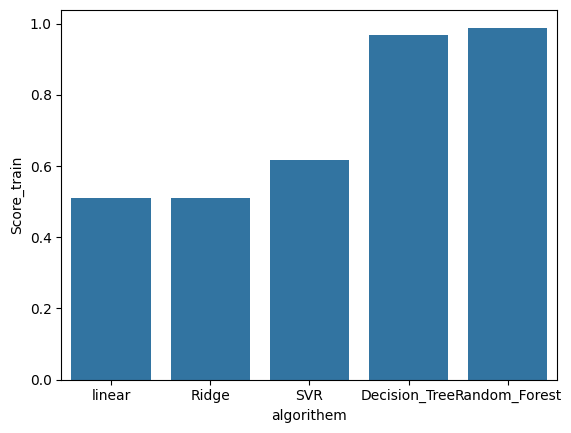

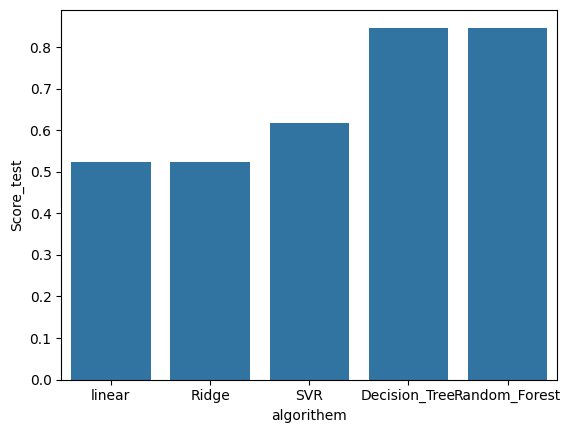

In [57]:
sns.barplot(x=algo_score.algorithem,y=algo_score.Score_train)
plt.show()
sns.barplot(x=algo_score.algorithem,y=algo_score.Score_test)
plt.show()

## Random forest accurecy is more hence I am considering same for the production

In [58]:
## Let's start the pickling process 

import pickle 


## same the model to the file using pickling 

with open ('model.pkl','wb') as f:
    pickle.dump(best_random_model,f)
    

## load the model from file

with open ('model.pkl','rb') as f:
    loaded_model=pickle.load(f)

In [73]:
list(X_test.iloc[1,:])

[0.30808080808080807, 0.0, 0.9999999999999999, 1.0, 0.039004721514947494]

In [75]:
loaded_model.predict([list(X_test.iloc[1,:])])

array([118.14557])

In [63]:
pd.DataFrame(X_test.iloc[1,:]).T

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
1,0.308081,0.0,1.0,1.0,0.039005


In [64]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
